<a href="https://colab.research.google.com/github/MujeebDawar/ComputerVisionTask/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
from IPython.display import display
import ipywidgets as widgets

#  Reduces the number of intensity levels in a grayscale image.

In [42]:
def reduce_intensity_levels(image_array, num_levels):
    """
    Parameters:
        image_array (numpy.ndarray): The input image array (grayscale).
        num_levels (int): The desired number of intensity levels (must be a power of 2).

    Returns:
        numpy.ndarray: The processed image array with reduced intensity levels.
    """
    # Calculate the step size for the intensity reduction
    step = 256 // num_levels

    # Apply the intensity reduction
    reduced_image = (image_array // step) * step + (step // 2)

    return reduced_image



In [6]:
# Initialize a global variable for the uploaded image
uploaded_image = None

In [7]:
def upload_image():
    """ Upload an image file and store it globally. """
    upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
    display(upload_widget)

    def on_upload_change(change):
        global uploaded_image
        file_content = list(upload_widget.value.values())[0]['content']
        image = Image.open(BytesIO(file_content)).convert("RGB")
        uploaded_image = np.array(image)
        print("Image uploaded successfully!")
        upload_widget.close()  # Hide the widget after upload

    upload_widget.observe(on_upload_change, names='value')


In [18]:
# Display the file upload widget
upload_image()

FileUpload(value={}, accept='image/*', description='Upload')

Image uploaded successfully!


In [40]:
# Set the desired number of intensity levels (must be a power of 2, e.g., 2, 4, 8, 16, ...)
num_levels = 3  # Change this value to test with different numbers of levels
# Reduce the intensity levels
reduced_image_array = reduce_intensity_levels(uploaded_image, num_levels)
# Convert the processed array back to an image
reduced_image = Image.fromarray(reduced_image_array.astype(np.uint8))

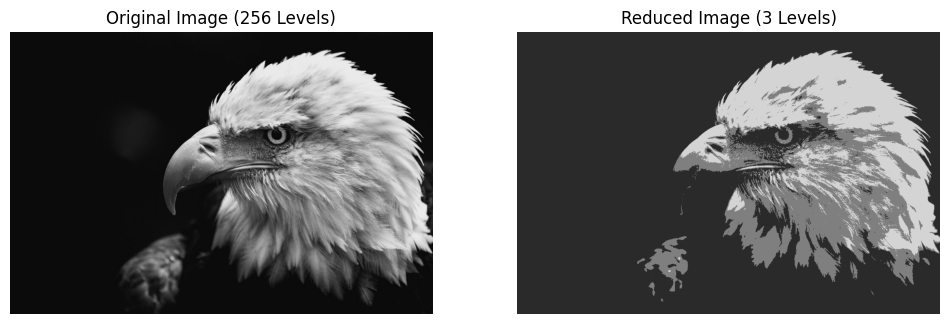

In [41]:
# Display the original and reduced images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(uploaded_image, cmap="gray")
ax[0].set_title("Original Image (256 Levels)")
ax[0].axis("off")

ax[1].imshow(reduced_image, cmap="gray")
ax[1].set_title(f"Reduced Image ({num_levels} Levels)")
ax[1].axis("off")

plt.show()